#### [ 시도별 전출입 인구수 분석 - Matplotlib ]
 - 데이터셋 : 1970년 ~ 2017년까지 인구이동수
 - 대구의 타지역 이동 인구수 분석
 - 전국의 인구 이동수에 대한 분석
 - 과정
  * 데이터파일 확인
    - 첫번째 줄이 컬럼명이 맞는지 확인 
    - 불필요한 컬럼이나 행이 있는지 확인
    - 결측치 정도 확인
  * 전처리
    - 파일 확인 후 체크한 사항 진행
    - 결측치 처리
    - 이상치 처리
    - 중복데이터 처리
    - 형변환 => 실제 데이터와 타입 일치
  * 데이터 가공 : 분석하고자하는 데이터 형태
    - 행인덱스 처리 : 멀티인덱스 / 컬럼 => 행인덱스 / 행인덱스 초기화
    - 필요한 컬럼 & 행 추출
    - 추가적인 결측치 / 이상치 / 중복데이터 처리
  * 데이터 분석
    - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
    - 시각화 및 분석 결과 텍스트 요약 정리

- [1] 준비 과정

In [192]:
# [1-1] 모듈로딩
import pandas as pd     # 데이터 분석용 모듈
import matplotlib.pyplot as plt         # 데이터 시각화용 모듈

In [193]:
F_DATA = r'C:\Git\KDT\BigData\EX_PANDAS6\Day07\시도별 전출입 인구수.xlsx'

In [194]:
# [1-3] DATA ==> DataFrame 형태 저장
dataDF = pd.read_excel(F_DATA, engine = 'openpyxl')

- [2] 데이터 확인 : 행과 컬럼수, 실제 데이터와 컬럼 타입, 결측치 체크

In [195]:
# [2-1] 기본 정보 확인 => info(), dexcribe()
# - 행 수, 컬럼 수, 컬럼별 결측치 아닌 (non-null) 데이터 수, 컬럼별 데이터 타입 
# - 메모리 사용량
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [196]:
# [2-1] 기본 정보 확인 => info(), describe()
# - 수치 데이터 컬럼의 데이터 분포 확인 : 최대값, 최소값, 표준편차, 사분위수, 평균값
# - 범주 데이터 컬럼의 데이터 분포 확인 : 고유값, 가장 많이 나온 값, 가장 많이 나온 값의 빈도수
dataDF.describe(include='all')

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,1489,822,2026,1468,907,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [197]:
# [2-3] 실제 데이터 info()에서 확인 한 타입 비교 => head() / tail()
dataDF.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [198]:
### 기본정보 확인 후 결과
# - 불필요한 행/컬럼 : 0번행 삭제
# - 결측치 : '전출지별' 컬럼,
# - 이상치 : 행별로 '-' 값이 수치값과 섞여 있음 ==> 처리 필요!


- [3] 데이터 전처리 
    * 기본확인 파악된 내용들 처리
    * 불필요 데이터 삭제 : 0번행 삭제
    * 결측치 데이터 처리 : '전출지별' 컬럼 처리
    * 이상치 데이터 처리 : '-'
    * 데이터 자료형 일치 : 형변환

In [199]:
# [3-1] 불필요 데이터 처리
copyDF = dataDF.drop(index=0)
print(f'확인\n{copyDF.head(3)}')


확인
  전출지별   전입지별     1970     1971     1972     1973     1974     1975     1976  \
1   전국     전국  4046536  4210164  3687938  4860418  5297969  9011440  6773250   
2  NaN  서울특별시  1742813  1671705  1349333  1831858  2050392  3396662  2756510   
3  NaN  부산광역시   448577   389797   362202   482061   680984   805979   724664   

      1977  ...     2008     2009     2010     2011     2012     2013  \
1  7397623  ...  8808256  8487275  8226594  8127195  7506691  7411784   
2  2893403  ...  2025358  1873188  1733015  1721748  1555281  1520090   
3   785117  ...   514502   519310   519334   508043   461042   478451   

      2014     2015     2016     2017  
1  7629098  7755286  7378430  7154226  
2  1573594  1589431  1515602  1472937  
3   485710   507031   459015   439073  

[3 rows x 50 columns]


In [200]:
# [3-1] 결측치 데이터 처리 => isna() / isnull()
copyDF.isna().sum()
# print

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [201]:
# - '1984','1985','1986' 컬럼만 추출
# print()
a = copyDF[['1984','1985','1986']].isna()
a[a.sum(axis = 1) > 0]



# copyDF[copyDF[[1984,1985,1986]].isna()]

,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


In [202]:
# - 전출지별
copyDF['전출지별'].ffill(inplace=True)

pd.set_option('future.no_silent_downcasting', True)
copyDF.fillna(0, inplace=True)

C:\Users\kjy19\AppData\Local\Temp\ipykernel_11452\1896782043.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copyDF['전출지별'].ffill(inplace=True)


In [203]:
# copyDF[copyDF['전출지별']=='대구광역시']

In [204]:
copyDF[['1984','1985','1986']] = copyDF[['1984','1985','1986']].fillna(0)

In [205]:
df2 = pd.DataFrame([[1,1,pd.NA], [pd.NA, pd.NA,2], [pd.NA,3,3]])
df2

,0,1,2
0,1,1,<NA>
1,<NA>,<NA>,2
2,<NA>,3,3


In [206]:
# - 0번 컬럼을 이전 행 값으로 채우기
a = df2[0].ffill(inplace=True)
print(a, df2, sep="\n")

None
   0     1     2
0  1     1  <NA>
1  1  <NA>     2
2  1     3     3


C:\Users\kjy19\AppData\Local\Temp\ipykernel_11452\198597017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a = df2[0].ffill(inplace=True)


In [207]:
# df2[[1,2]].ffill(inplace=True)

df2[[1,2]] = a
df2

,0,1,2
0,1,None,None
1,1,None,None
2,1,None,None


In [208]:
df2

,0,1,2
0,1,None,None
1,1,None,None
2,1,None,None


In [209]:
# [3-3] 이상치 데이터 처리
copyDF.replace('-',0,inplace=True)


In [210]:
# [3-4] 자료형 변환
d_ = dict(zip(copyDF.columns[2:].to_list(),['int']*(copyDF.shape[1]-2)))     # 전출지 전입자 칼럼은 날려야하니까
# copyDF = copyDF.astype({1970:'int',1971:'float',....,2017:'int'})
copyDF=copyDF.astype(d_)

- [4] 데이터 가공
 * 

In [211]:
#  - 대구광역시 데이터만 추출
mask = copyDF['전출지별'] == '대구광역시'
cityDF = copyDF[mask]
# cityDF

In [212]:
#  - 전출지별 칼럼 삭제
cityDF = copyDF.drop('전출지별', axis=1)
#  - 전dlq지별 칼럼 god 인덱스 설정
cityDF.set_index('전입지별', inplace=True)

In [213]:
# 전국 행 삭제
cityDF.drop(['대구광역시','전국'],inplace=True)

In [214]:
print(f'cityDF.dtype\n {cityDF.dtypes}')

cityDF.dtype
 1970    int64
1971    int64
1972    int64
1973    int64
1974    int64
1975    int64
1976    int64
1977    int64
1978    int64
1979    int64
1980    int64
1981    int64
1982    int64
1983    int64
1984    int64
1985    int64
1986    int64
1987    int64
1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object


#### [5] 히스토그램으로 특정 컬럼 데이터 분포 시각화

In [215]:
# 2000년도 데이터의 분포
cityDF.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [216]:
# 값 기준 정렬 ==> [기본] 오름차순
cityDF['2000'].sort_values(ascending = False)

전입지별
서울특별시      2219407
경기도        2042327
서울특별시      1582429
경기도        1284156
부산광역시       595975
            ...   
세종특별자치시          0
세종특별자치시          0
세종특별자치시          0
세종특별자치시          0
세종특별자치시          0
Name: 2000, Length: 288, dtype: int64

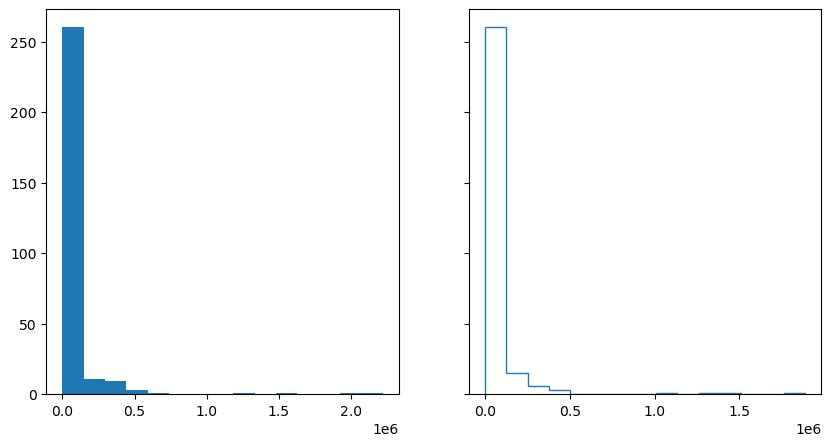

In [217]:
# 2000년도 대구 지역에서 타지역으로 이동인구수 분포
fig = plt.figure(figsize=(10,5))
ax1, ax2 = fig.subplots(1,2,sharey=True)
ax1.hist(cityDF['2000'], bins=15, histtype='stepfilled')
ax2.hist(cityDF['2017'], bins=15, histtype='step')

plt.show()

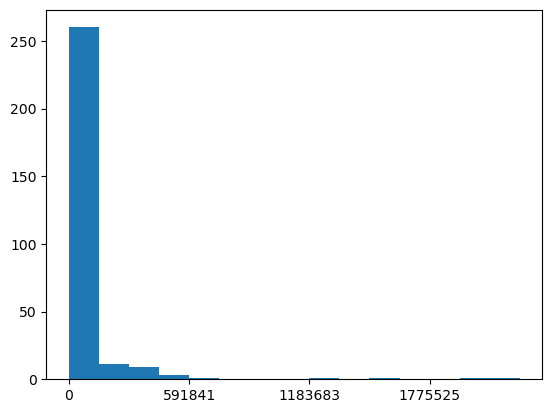

In [218]:
# 2000년도 대구 지역에서 타지역으로 이동인구수 분포
n, bin, obj = plt.hist(cityDF['2000'], bins = 15, histtype='stepfilled')
# print(f'n => {n}')
# print(f'bin => {bin.tolist()}')
labels = list(map(int,bin.tolist()))
plt.xticks(bin[::4], labels[::4])
plt.show()